In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

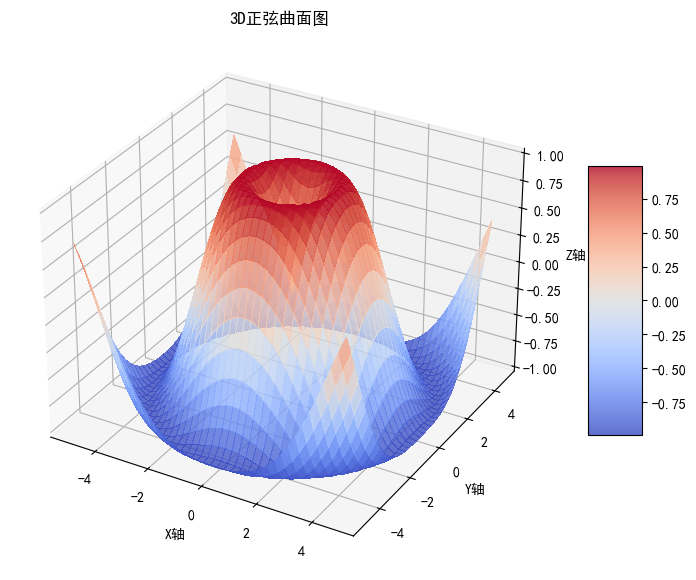

In [3]:
# 创建图形和3D坐标轴
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 生成数据
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(x, y)  # 创建网格
z = np.sin(np.sqrt(x**2 + y**2))  # 计算Z值，这里使用正弦函数

# 绘制曲面
surf = ax.plot_surface(x, y, z,            # 三维坐标数据
                       cmap='coolwarm',    # 使用冷暖色调映射
                       rstride=1,          # 行步长
                       cstride=1,          # 列步长
                       alpha=0.8,          # 透明度
                       linewidth=0.5,      # 网格线宽度
                       antialiased=False,  # 不启用抗锯齿
                      )

# 添加颜色条
fig.colorbar(surf, shrink=0.5, aspect=5)

# 设置坐标轴标签
ax.set_xlabel('X轴')
ax.set_ylabel('Y轴')
ax.set_zlabel('Z轴')
ax.set_title('3D正弦曲面图')

plt.show()

# 2、使用示例：

### 示例 1：3D曲面图及其等高线投影

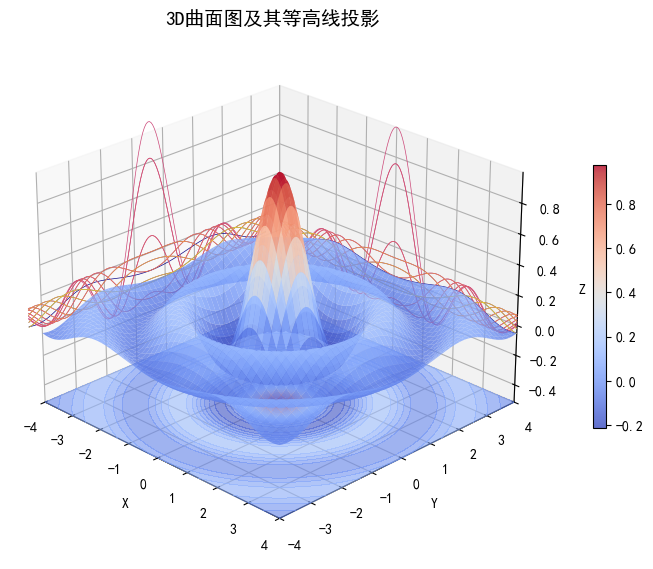

In [4]:
from matplotlib import cm

# 创建数据网格
x = np.linspace(-4, 4, 150)
y = np.linspace(-4, 4, 150)
X, Y = np.meshgrid(x, y)
# 定义曲面函数
Z = np.sinc(np.sqrt(X**2 + Y**2))

# 创建图形和3D坐标轴
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(212, projection='3d')

# 绘制曲面
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                      alpha=0.8)

# 添加详细的等高线投影
# 底部投影（填充）
ax.contourf(X, Y, Z, 25, zdir='z', 
           offset=np.min(Z) - 0.3, cmap=cm.coolwarm, alpha=0.6)

# 侧面投影（线）
ax.contour(X, Y, Z, 25, zdir='x', 
          offset=np.min(X) - 0.5, cmap=cm.plasma, linewidths=0.5)

# 后面投影（线）
ax.contour(X, Y, Z, 25, zdir='y', 
          offset=np.max(Y), cmap=cm.plasma, linewidths=0.5)

# 设置视角
ax.view_init(elev=25, azim=-45)

# 添加颜色条和标签
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=20)

ax.set_title('3D曲面图及其等高线投影', fontsize=14)
ax.set_xlabel('X', labelpad=5)
ax.set_ylabel('Y', labelpad=5)
ax.set_zlabel('Z', labelpad=5)

ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([np.min(Z) - 0.3, np.max(Z)])

plt.show()

### 示例 2：在同一图形中绘制二维和三维图

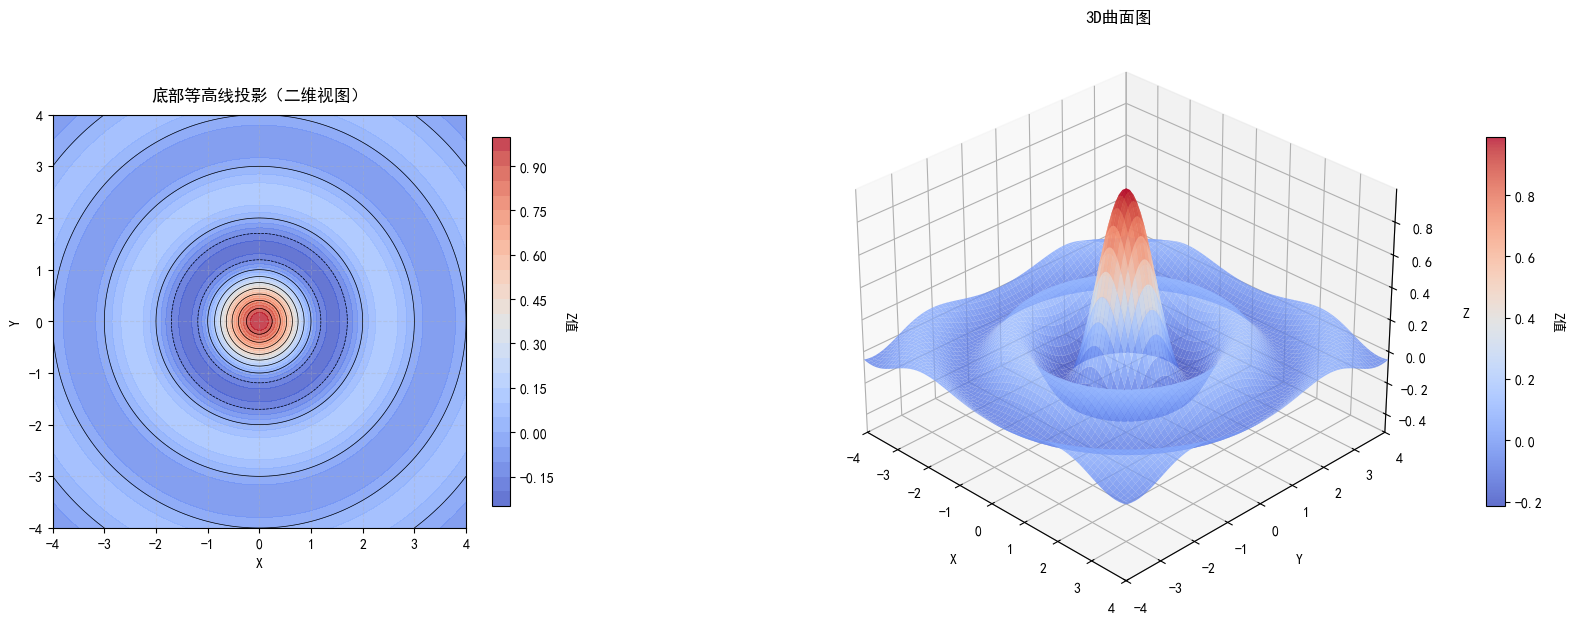

In [5]:
from matplotlib import cm

# 创建数据网格
x = np.linspace(-4, 4, 150)
y = np.linspace(-4, 4, 150)
X, Y = np.meshgrid(x, y)
# 定义曲面函数
Z = np.sinc(np.sqrt(X**2 + Y**2))

# 创建图形，使用GridSpec精确控制布局
fig = plt.figure(figsize=(20, 8)) 
gs = plt.GridSpec(1, 2, width_ratios=[1, 1.5])  # 1行2列，右侧稍宽

# ============== 第一个子图：底部等高线图（二维，正方形） ==============
ax1 = fig.add_subplot(gs[0])  # 左侧图

# 绘制二维等高线填充图
contour = ax1.contourf(X, Y, Z, 25, cmap=cm.coolwarm, alpha=0.8)
# 添加等高线线条
ax1.contour(X, Y, Z, 10, colors='black', linewidths=0.5)

# 添加颜色条和标签
cbar = fig.colorbar(contour, ax=ax1, shrink=0.6, aspect=20, pad=0.05)
cbar.set_label('Z值', rotation=270, labelpad=15)

ax1.set_title('底部等高线投影（二维视图）', fontsize=12, pad=10)
ax1.set_xlabel('X', labelpad=5)
ax1.set_ylabel('Y', labelpad=5)
ax1.set_xlim([-4, 4])
ax1.set_ylim([-4, 4])
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.set_aspect('equal')

# ============== 第二个子图：3D曲面图（三维）==============
ax2 = fig.add_subplot(gs[1], projection='3d')  # 右侧图

# 绘制曲面
surf = ax2.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       alpha=0.8, rstride=2, cstride=2,
                       linewidth=0.2, antialiased=True)

# 设置视角
ax2.view_init(elev=30, azim=-45)

# 添加颜色条和标签
cbar = fig.colorbar(surf, ax=ax2, shrink=0.6, aspect=20, pad=0.1)
cbar.set_label('Z值', rotation=270, labelpad=15)

ax2.set_title('3D曲面图', fontsize=12)
ax2.set_xlabel('X', labelpad=10)
ax2.set_ylabel('Y', labelpad=10)
ax2.set_zlabel('Z', labelpad=10)

ax2.set_xlim([-4, 4])
ax2.set_ylim([-4, 4])
ax2.set_zlim([np.min(Z)-0.3, np.max(Z)])

# 调整布局
plt.subplots_adjust(wspace=0.4)  # 调整子图水平间距
plt.show()